# Données multimédia : Python pour le traitement d’images et de données audio

## Master Humanités Numériques du [CESR](https://cesr.univ-tours.fr/)

Clément Plancq (MSH VDL / CITERES)

# Traitement d’images

- Nous travaillerons avec des *images numériques* c’est-à-dire des images acquises (par un scanner ou un appareil photo) ou créées (par un programme) sous forme binaire
- Une image numérique est stockée sous forme de fichier informatique
- Nous travaillerons avec des images matricielles (bitmap), pas des images vectorielles
- Nous travaillerons avec des images en 2D (pas en 3D, pas de stéréoscopie)

### image > image numérique > image matricielle > image 2D

## Définition et résolution

- Une image numérique matricielle en 2 dimensions est un tableau de points. Les points sont appelés **pixels**
- La **définition** d’une image est son nombre de pixels, exprimé en lignes x colonnes ou hauteur x largeur. Exemple : un photo de 800 x 600
- La **résolution** d’une image est le nombre de pixels par pouce (ppp) ou *pixels par inch* (ppi), elle donne une indication sur la densité de pixels

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image dans un tableau numpy (ndarray)
image_path = '../img/CPR_1130x400.jpg'
image = plt.imread(image_path)
print(type(image))

# On obtient la définition de l'image (hauteur x largeur en pixels)
# avec la dimension du tableau ndarray
height, width, _ = image.shape
print(f"hauteur : {height}, largeur : {width}")

<class 'numpy.ndarray'>
hauteur : 400, largeur : 1130


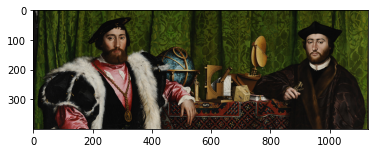

In [21]:
import matplotlib.pyplot as plt

# on va quand même afficher l’image pour vérifier
plt.imshow(image)

## Couleurs

Il existe plusieurs solutions pour le codage informatique des couleurs. 

- RGB (*red*, *green*, *blue*), le plus courant. Grâce au principe de [synthèse additive](https://fr.wikipedia.org/wiki/Synth%C3%A8se_additive) on peut obtenir les autres couleurs en combinant les 3 canaux rouge, vert, bleu
- CMYK utilisé dans l’impression
- TSV (Teinte Saturation Valeur) voir https://fr.wikipedia.org/wiki/Teinte_Saturation_Valeur

On s’en tiendra au RGB dans le cours. Pour chaque pixel on a donc un vecteur de trois valeurs.

In [8]:
# On affiche la valeur du pixel à la position 200x100
pixel = image[200, 100]
print(pixel)

[186 178 167]


In [4]:
# rouge, vert, bleu
print(f"rouge: {pixel[0]}, vert: {pixel[1]}, bleu: {pixel[2]}")

rouge: 186, vert: 178, bleu: 167


## Couleurs RGB


|R  | V | B | Couleur  |
|---|---|---|:--------:|
|0  |0  |0  | noir     |
|255|0 	|0 	|rouge     |
|0  |255|0 	|vert      |
|0 	|0 	|255|bleu      |
|128|128|128|gris      |
|255|255|255|blanc     |

La couleur de chaque pixel est codée avec 3 valeurs, chacune est comprise entre 0 et 255, soit un octet (8 bits).  
Pour RGB on a donc 3 octets, 24 bits par pixel

Une image sera donc représentée par un tableau numpy à 3 dimensions : hauteur, largeur, nb de canaux de couleurs

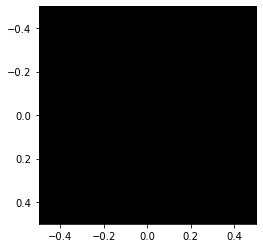

In [22]:
# Une image avec un seul pixel de couleur noire

black = [0, 0, 0]
pixel = np.array([[black]])
plt.imshow(pixel)

✏️ Affichez un pixel rouge, un vert, un bleu puis un jaune  
✏️ Affichez une ligne avec 3 pixels, un drapeau avec 3 couleurs  
✏️ Affichez un carré avec 4 couleurs différentes

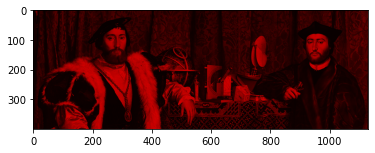

In [26]:
# Fonction qui annule les composantes vertes et bleues
def keep_red(img):
    # Créer une copie de l'image originale
    img_copy = np.copy(img)
    
    img_copy[:, :, 1] = 0  # Canal vert à zéro
    img_copy[:, :, 2] = 0  # Canal bleu à zéro
    
    return img_copy

image_red = keep_red(image)
plt.imshow(image_red)

✏️ Écrire la fonction keep_blue et affichez le résultat

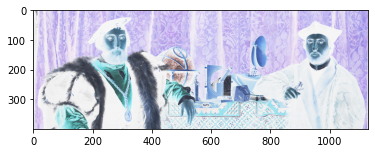

In [25]:
def inverse(img):
    img_copy = np.copy(img)
    
    # Inverser les couleurs en soustrayant chaque canal RVB de 255 (valeur maximale)
    img_copy = 255 - img_copy
    return img_copy

image_inverse = inverse(image)
plt.imshow(image_inverse)

## Sélection d’une partie d’une image

Puisqu’une image est une matrice hauteur x largeur stockée dans un tableau numpy, on peut sélectionner une sous-partie de l’image, c’est-à-dire découper un carré dans l’image.

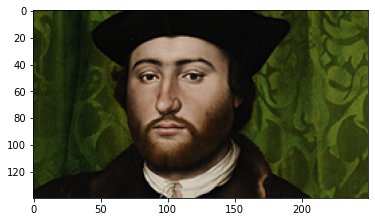

In [24]:
ligne_1 = 60
ligne_2= 200
colonne_1 = 850
colonne_2 = 1100
extrait = image[ligne_1:ligne_2, colonne_1:colonne_2]
plt.imshow(extrait)

✏️ Reproduire cette image : ![diagonale](../img/noir_blanc.png)

## Bibliothèque Pillow

[Pillow](https://pillow.readthedocs.io) offre un ensemble de fonctions de haut niveau pour le traitement d’images  
On trouve un éventail des possibilités dans le [tutoriel](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html)

### Lire et sauver une image

In [16]:
from PIL import Image

im = Image.open("../img/CPR_1130x400.jpg")
print(f"format: {im.format}, taille: {im.size}, mode: {im.mode}")

format: JPEG, taille: (1130, 400), mode: RGB


On peut convertir facilement une image. Ici de jpg à png par exemple

In [89]:
im.save("../img/CPR_1130x400.png", format="PNG")

### Accès aux données

Depuis un objet de la classe `Image` je peux accèder aux données sous forme de tableau numpy

In [106]:
image_array = np.asarray(im)
print(image_array[200,100])

[186 178 167]


### Retailler une image

La fonction `resize` permet de retailler une image en indiquant la taille désirée en paramètre

✏️ Parcourez la [documentation de la fonction](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.resize) et 
 1. retaillez notre image de moitié
 2. agrandissez la de 20%

### Rotation

La fonction [`rotate`](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.rotate) permet de faire pivoter une image

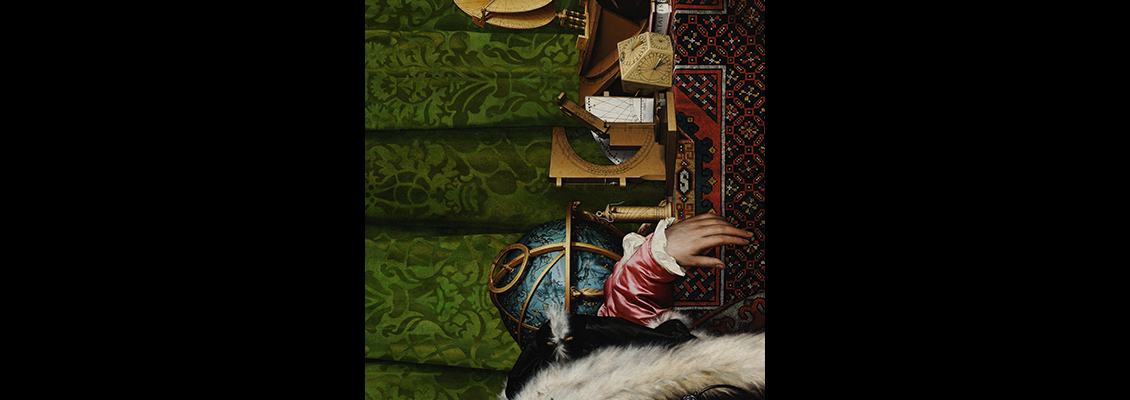

In [27]:
from IPython.display import display

im_90 = im.rotate(90)
display(im_90)

✏️  Quelque chose ne va pas. Parcourez la documentation de `rotate` pour que l’image retournée s’affiche correctement  
✏️ Faîtes faire un tour complet à l’image `../img/noir_blanc.png` en 4 étapes

### Niveaux de gris

La fonction [`convert`](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.convert) permet
de transformer une image en niveaux de gris

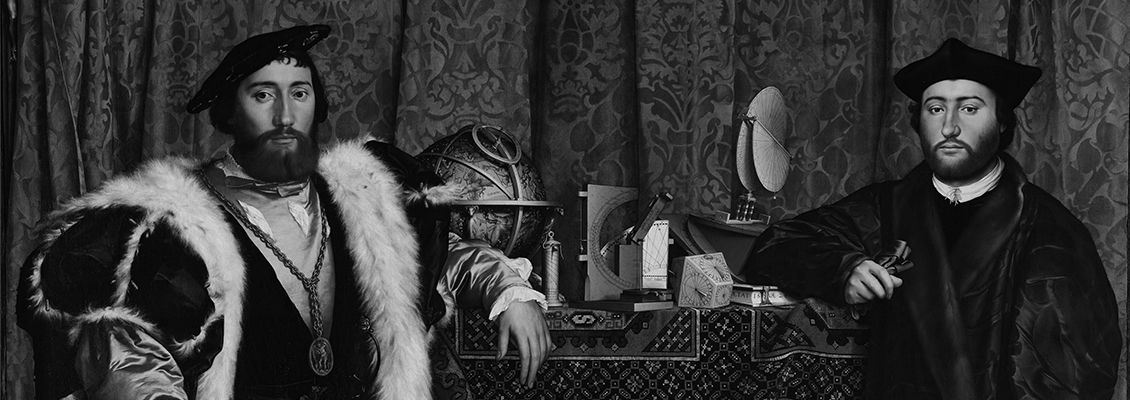

In [28]:
im_grayscale = im.convert('L')
display(im_grayscale)

✏️ Comment faire cette opération depuis un tableau numpy sans passer par Pillow ?